### Exercise 4: NumPy package

In [69]:
import numpy as np

In [70]:
nums = np.array([
    [1, 2, 3, 4],
    [6, 9, 12, 7],
    [2, 0, 9, 10]])
A = nums[:, :3]
b = nums[:, 3]

x = np.linalg.solve(A, b)
A @ x

array([ 4.,  7., 10.])

### Exercise 5: SciPy package

In [71]:
import scipy as sp
import matplotlib.pyplot as plt

In [72]:
coeffs

array([ 2.99999264,  1.00106185, -2.00736185,  3.91800201])

In [73]:
np.polyder(coeffs)

array([ 8.99997792,  2.00212369, -2.00736185])

 message: A solution was found at the specified tolerance.
 success: True
  status: 1
     fun: [-4.792e-07]
       x: -1.4346363226029135
     nit: 12 -4.792394676655931e-07


C:\Users\PC\AppData\Local\Temp\ipykernel_20812\429711795.py:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  coeffs = sp.polyfit(x, y, 3)
c:\Users\PC\miniconda3\lib\site-packages\scipy\optimize\_root.py:256: RuntimeWarning: Method krylov does not use the jacobian (jac).
  warn('Method %s does not use the jacobian (jac).' % (method,),


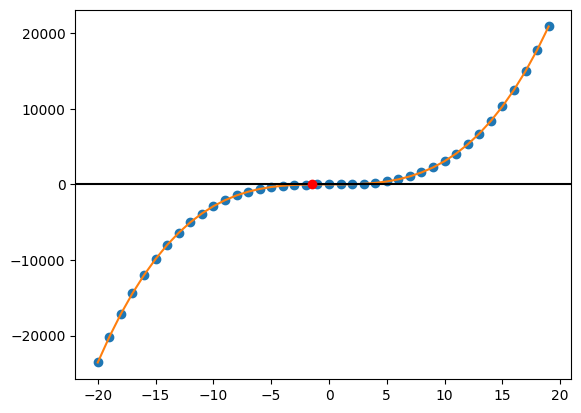

In [74]:
data = np.array([[-20, -23555.255109],[-19, -20173.3974282],[-18, -17132.3837602],[-17, -14411.0122397],[-16, -11995.5143165],[-15, -9866.56079994],[-14, -8003.20516776],[-13, -6391.33486532],[-12, -5011.46272799],[-11, -3846.72649659],[-10, -2875.44384973],[-9, -2084.52334173],[-8, -1451.39186881],[-7, -962.410182094],[-6, -595.527093183],[-5, -336.594621263],[-4, -164.079980951],[-3, -62.3865271886],[-2, -11.4248727521],[-1, 3.06432478431],[0, 4.2075972256],[1, 6.21613879401],[2, 27.6438528957],[3, 88.1769918986],[4, 204.004215243],[5, 393.974856926],[6, 676.404800703],[7, 1067.92293554],[8, 1587.79538772],[9, 2254.39823935],[10, 3084.45830648],[11, 4095.6559199],[12, 5307.24683802],[13, 6737.59055266],[14, 8404.59368987],[15, 10323.5165333],[16, 12515.2158242],[17, 14998.1210883],[18, 17788.5813223],[19, 20904.4422828],])
x, y = data[:,0], data[:,1]
coeffs = sp.polyfit(x, y, 3)

plt.plot(x, y, 'o')
plt.plot(x, np.polyval(coeffs, x))

# Determine roots using scipy
fun = lambda x: np.polyval(coeffs, x)
jac = lambda x: np.polyval(np.polyder(coeffs), x)
roots = sp.optimize.root(fun, 10, jac=jac, method='krylov')
print(roots, fun(roots.x))
plt.axhline(0, color='black')
plt.plot(roots.x, fun(roots.x), 'ro')


### Exercise 6: Numba package
Accelerate Python Functions

In [75]:
def sum(n=1000):
    total = 0
    for i in range(1, n):
        total += 1/(i**2)
    return total

def iter_sum(iterations=2000):
    for _ in range(iterations):
        sum()

%timeit iter_sum()

721 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
from numba import njit

@njit
def sum(n=1000):
    total = 0
    for i in range(1, n):
        total += 1/(i**2)
    return total

@njit
def iter_sum(iterations=2000):
    for _ in range(iterations):
        sum()

%timeit iter_sum()

186 ns ± 6.08 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Exercise 7: Pandas package tutorial
Matt Harrison YT tytorial https://www.youtube.com/watch?v=zgbUk90aQ6A
- Load Data
- Types
- Chaining
- Mutation
- Apply
- Aggregation

In [77]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
pd.options.display.min_rows = 5
autos = pd.read_csv('https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip')

C:\Users\PC\AppData\Local\Temp\ipykernel_20812\2138244784.py:2: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  autos = pd.read_csv('https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip')


In [79]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [80]:
autos

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41142,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
41143,18.311667,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [93]:
cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']
autos[cols].dtypes  # static types allow for fast operations 
                    # (not for object types can be caused by missing values represented by NaN string)

city08          int64
comb08          int64
highway08       int64
cylinders     float64
displ         float64
drive          object
eng_dscr       object
fuelCost08      int64
make           object
model          object
trany          object
range           int64
createdOn      object
year            int64
dtype: object

In [82]:
autos[cols].memory_usage(deep=True), autos[cols].memory_usage(deep=True).sum()

(Index             128
 city08         329152
 comb08         329152
 highway08      329152
 cylinders      329152
 displ          329152
 drive         3028369
 eng_dscr      2135693
 fuelCost08     329152
 make          2606267
 model         2813134
 trany         2933276
 range          329152
 createdOn     3497240
 year           329152
 dtype: int64,
 19647323)

In [83]:
# Chaining operations for ease of read
(autos
    [cols]
    .select_dtypes(int)
    .describe()
)

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


#### Downcasting
Compress the data by using smaller data types while ensuring no precisison is lost. The extends are seen in the above table and the following gives extents of data types.

In [98]:
np.iinfo(np.int8), np.iinfo(np.int16), np.iinfo(np.int32)

(iinfo(min=-128, max=127, dtype=int8),
 iinfo(min=-32768, max=32767, dtype=int16),
 iinfo(min=-2147483648, max=2147483647, dtype=int32))

In [96]:
# Convert to smaller types
(autos
    [cols]
    .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16'})  # dictionary of column names and new types
    .select_dtypes([int, 'int8'])
    .describe()
 )

,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000
mean,24.504667,2362.335942,0.793506,2001.535266
std,7.730364,654.981925,13.041592,11.142414
min,9.000000,500.000000,0.000000,1984.000000
25%,20.000000,1900.000000,0.000000,1991.000000
50%,24.000000,2350.000000,0.000000,2002.000000
75%,28.000000,2700.000000,0.000000,2011.000000
max,124.000000,7400.000000,370.000000,2020.000000


In [99]:
# Convert to smaller types
(autos
    [cols]
    .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 
             'fuelCost08': 'int32', 'range': 'int16', 'year': 'int16'})
    .select_dtypes(['integer'])  # See all integer types
    .describe()
 )

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [114]:
# Convert to smaller types
(autos
    [cols]
    .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 
             'fuelCost08': 'int16', 'range': 'int16', 'year': 'int16'})
    .memory_usage(deep=True)
    .sum()  # Was 19647323
 )

18124995

In [100]:
autos[cols].memory_usage(deep=True).sum()

19647323

In [101]:
# Chaining operations for ease of read
(autos
    [cols]
    .select_dtypes(int)
    .dtypes
)

city08        int64
comb08        int64
highway08     int64
fuelCost08    int64
range         int64
year          int64
dtype: object

Do the same for floats, and notice that because some elements are missing, an int8 is instead a float

In [104]:
(autos
    [cols]
    .select_dtypes('float')
)

,cylinders,displ
0,4.0,2.0
1,12.0,4.9
...,...,...
41142,4.0,2.2
41143,4.0,2.2


In [105]:
autos.cylinders.describe()  # Count less than total rows, so there are missing values

count    40938.000000
mean         5.717084
std          1.755517
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64

In [106]:
autos.cylinders.value_counts(dropna=False)

4.0     15938
6.0     14284
8.0      8801
5.0       771
12.0      626
3.0       279
NaN       206
10.0      170
2.0        59
16.0       10
Name: cylinders, dtype: int64

In [107]:
(autos  # Which cars have missing cylinders?
 [cols]
 .query('cylinders.isna()')
 )

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,NaN,NaN,NaN,NaN,800,Nissan,Altra EV,NaN,90,Tue Jan 01 00:00:00 EST 2013,2000
7139,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34566,104,104,104,NaN,NaN,All-Wheel Drive,NaN,650,Tesla,"Model S Performance (19"" Wheels)",Automatic (A1),345,Thu May 02 00:00:00 EDT 2019,2019
34567,98,97,96,NaN,NaN,All-Wheel Drive,NaN,700,Tesla,"Model S Performance (21"" Wheels)",Automatic (A1),325,Thu May 02 00:00:00 EDT 2019,2019


In [108]:
# add cylinders and displ
(autos[cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0))
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 
             'fuelCost08': 'int16', 'range': 'int16', 'year': 'int16'})
 .describe()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.688460,3.277904,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.797009,1.373415,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,0.000000,0.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,2.200000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,3.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,4.300000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,8.400000,7400.000000,370.000000,2020.000000


##### Continues
Add for empty and downcasting for floats and objects.
Using categorical type.

Splitting columns into seperate types too!

In [117]:
def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 
            'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']
    return (autos[cols]
            .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
                    displ=autos.displ.fillna(0).astype('float16'),
                    drive=autos.drive.fillna('Other').astype('category'),
                    automatic=autos.trany.str.contains('Auto'),
                    speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
                    createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00', 
                            ' EST': '-05:00'}, regex=True)), # Replace timezone strings with offsets
                    ffs=autos.eng_dscr.str.contains('FFS'),
                    )
            .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 
                     'fuelCost08': 'int16', 'range': 'int16', 'year': 'int16', 'make': 'category'})
            .drop(columns=['trany', 'eng_dscr'])
            )
tweak_autos(autos)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41142,18,21,24,4,2.199219,4-Wheel or All-Wheel Drive,2000,Subaru,Legacy AWD,0,2013-01-01 00:00:00-05:00,1993,False,5,True
41143,16,18,21,4,2.199219,4-Wheel or All-Wheel Drive,2900,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,True,4,True
